OASIS INFOBYTE INTERNSHIP

TASK:5 SALES PREDICTION USING PYTHON

NAME: VANSHIKA JINDAL 

In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

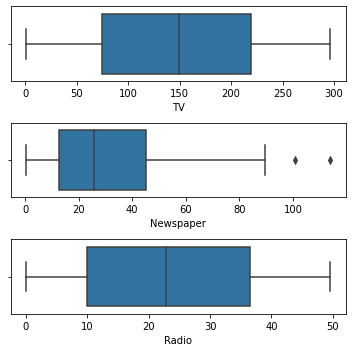

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()


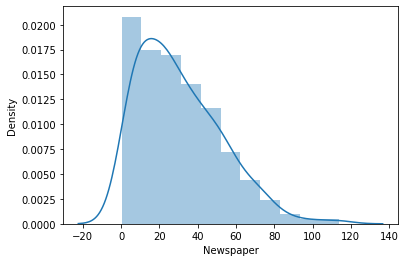

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>93,'Newspaper']=93

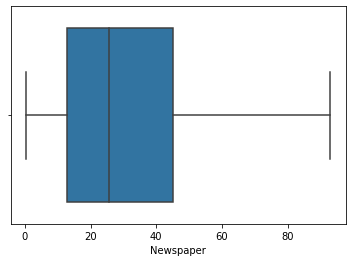

In [ ]:
sns.boxplot(data['Newspaper'])

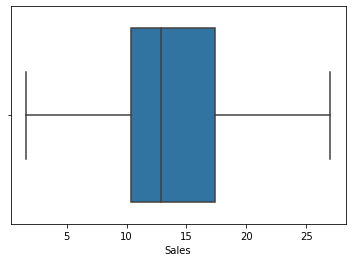

In [ ]:
sns.boxplot(data['Sales']);

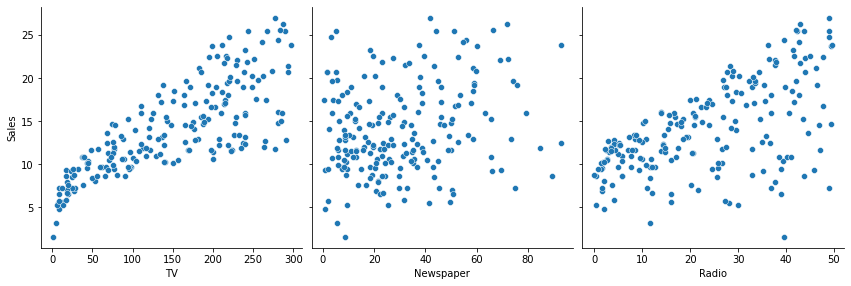

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

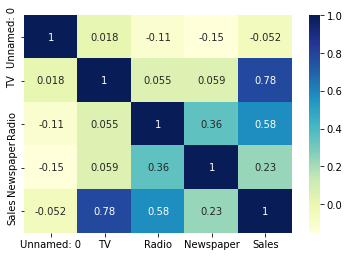

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [ ]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[10.82  7.48 13.48 11.86 19.12 13.88 13.4  14.28 13.48 12.2  16.04 15.42
  8.02 17.72 21.56 12.2  16.12 16.44 18.1   4.76 20.06 15.24 10.74 18.26
  7.64 12.04 18.64 15.18 10.38 18.06 13.24 15.56 16.66 10.68 19.16 14.46
 15.62 13.7  13.82 11.8  10.06  5.88  9.58 10.74 17.46 10.36 17.18 14.1
 11.6  13.74 17.92 18.24 13.74 21.6  17.46 10.18 16.64 16.94  6.7  20.2
 21.26 15.42 16.12  8.02 17.46 10.68 17.18  7.64 10.22  5.88 17.46  9.58
  8.34  7.48 20.68 21.6  15.36 12.04 15.78 12.02 13.82  5.88 17.46 13.3
 16.52 10.74 10.22 18.1  16.36 11.14 12.02 12.46 21.6  13.86 19.38 16.52
 15.   13.82 14.46  6.24 11.14  5.88 15.62 10.   10.36 19.12 16.66 17.18
 21.2  15.56 16.12 21.4  11.14 18.54 17.72 13.9  16.12 10.44 10.5  10.36
 20.2  10.   10.26  5.88 12.74 18.54  6.7  19.96 19.16 15.78 10.82 11.2
 19.7  14.94] [19.7  10.36 13.68 10.82 15.42 13.3  12.46 16.44 12.46 21.4  20.06  5.88
  4.76 16.88 17.46  8.02 12.04 18.26 13.74 12.2  13.82  6.7  11.96 13.86
 22.12 13.48  8.02 16.86 21.26 18.64 10.6

In [ ]:
Result = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Result = Result.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5345145404612177
RMSE: 3.382945641319294


In [ ]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.664107,0.534515,3.382946,0.129593


In [ ]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[11.19629753  7.94510835 14.50902295 12.12920626 17.44092312 12.64059399
 13.09971456 17.08246065 14.56664436 10.64692769 16.35794663 17.36997228
  8.32961096 17.43197127 17.24477972 10.66455132 16.24547556 16.9871313
 17.30969608  7.4468446  16.8637351  17.04004385 10.34173151 16.67557474
  8.1155361  11.9205369  16.96694878 15.09342648 10.86676317 15.69971494
 14.44621247 17.38539517 16.45822163 11.09285121 17.22042413 12.89806192
 15.16035377 13.62771462 13.24291996 11.81554435  9.32934916  7.59465769
  9.91324555 10.36983285 17.18657997  8.79160182 15.44433435 14.09785813
 11.74449043 13.83749297 16.05351783 15.85649784 13.75201541 17.11746516
 17.16132891  8.73543945 15.95380835 15.35392609  7.85598913 16.7690535
 16.83263899 17.3581269  16.24547556  8.27895228 17.17978842 10.04779164
 15.55843279  8.16728244  9.05620268  7.59712514 17.26637912  9.80695998
  8.4671069   7.91094021 16.90420596 17.02404662 17.12780998 12.01107878
 17.39598157 10.62923748 14.80752374  7.52338392 17.2

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Result = Result.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.610906747414131
RMSE: 3.0929208732718614


In [ ]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.664107,0.534515,3.382946,0.129593
1,Support Vector Machine,0.560167,0.610907,3.092921,-0.050739


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()

In [ ]:
model.params

const    6.748201
x1       0.049156
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     209.9
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           4.66e-29
Time:                        12:58:02   Log-Likelihood:                -350.34
No. Observations:                 134   AIC:                             704.7
Df Residuals:                     132   BIC:                             710.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7482      0.584     11.555      0.0

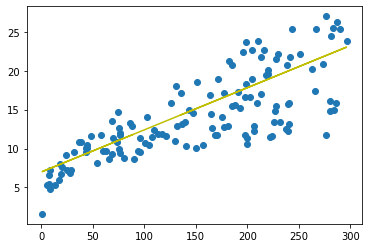

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [ ]:
y_train_pred =  model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

88     1.811296
172   -0.111665
171   -0.334416
31    -0.397949
36     5.531977
         ...   
146   -5.350633
107   -2.491932
51    -0.983495
93     3.118478
99     3.805865
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([11.08870394,  7.71166471, 14.83441557, 12.29794942, 19.8680228 ,
       12.92715033, 13.44329169, 17.75921664, 14.88848752, 10.4398405 ,
       16.70235575, 18.4572364 ,  8.1540716 , 18.703018  , 20.52180186,
       10.45950303, 16.56963369, 17.58716952, 20.34975474,  6.78261025,
       17.38562861, 17.68056653, 10.11049316, 17.11035321,  7.91812126,
       12.02758966, 17.5527601 , 15.38496636, 10.69053774, 15.97975784,
       14.77542798, 18.51130835, 16.82524655, 10.9608975 , 20.58078945,
       13.22208825, 15.44886958, 13.98892685, 13.59567629, 11.88995196,
        9.12245111,  7.17094518,  9.67791753, 10.13998695, 17.97058882,
        8.61614101, 15.72414497, 14.44608064, 11.79655495, 14.1953834 ,
       16.35334588, 16.1419737 , 14.11181765, 20.80690852, 17.91651687,
        8.56206906, 16.24520197, 15.63566359,  7.59368954, 17.24307528,
       21.31813426, 18.41791134, 16.56963369,  8.09999964, 17.95584193,
        9.8106396 , 15.83720451,  7.97710884,  8.86683824,  7.17

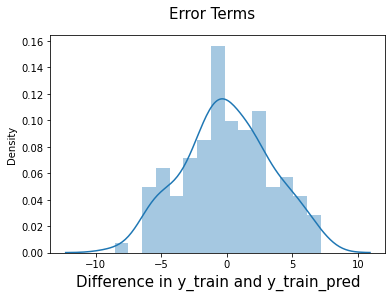

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

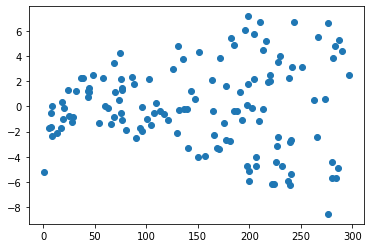

In [ ]:
plt.scatter(x_train, res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

array([18.95863087,  8.68987549, 12.79934389, 11.15752279, 18.41791134,
       13.69398893, 12.67153746, 17.57733826, 12.65679056, 19.224075  ,
       17.40529114,  7.16111392,  6.94974174, 18.27535801, 18.02957641,
        8.00660263, 12.14556483, 17.10543758, 14.10690202, 10.44967177,
       13.59076066,  7.59368954, 10.21863706, 15.22766613, 19.30272511,
       14.78525925,  8.06559022, 16.00925163, 21.03794323, 17.48885688,
       11.03463198, 10.08099936, 18.54080214, 21.14608714, 19.67139752,
        7.57894264, 14.94747511, 17.30206286, 15.35547257, 10.5922251 ,
       11.54094209,  8.62597227, 19.5927474 , 19.78445705,  9.20601686,
       17.68056653,  7.39706426, 13.60550755,  9.51078604, 16.26978013,
        7.98202447,  7.32332978, 12.45033402, 12.18980552, 13.34989469,
       15.98467347,  7.70183345, 18.9782934 , 17.33647229, 11.52619519,
       21.18049656, 17.48394125, 13.52685744, 10.03675868,  7.67233965,
       11.36397933])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.1211035422291475

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6037836127441827

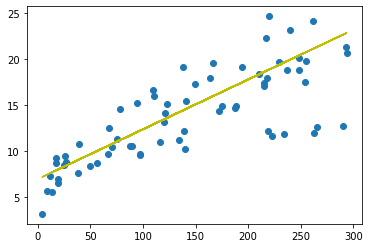

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()